In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.neighbors import NearestNeighbors
from PIL import Image
import os
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
drive.mount('/content/drive')

#  path to the folder containing your images
folder_path = "/content/drive/MyDrive/image"

Mounted at /content/drive


In [3]:
# Initialize an empty list to store the images
images = []

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is an image file
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Open the image using Pillow
        with Image.open(os.path.join(folder_path, filename)) as img:
            # Resize the image to match the input size expected by the model (64x64)
            img = img.resize((64, 64))
            # Convert the image to numpy array and normalize pixel values to the range [0, 1]
            img_array = np.array(img) / 255.0
            # Append the preprocessed image to the list
            images.append(img_array)

# Convert the list of images to a numpy array
X_train = np.array(images)

In [4]:
latent_dim = 128

# Encoder
encoder_inputs = keras.Input(shape=(64, 64, 3))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(128, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)


In [5]:
encoder = keras.Model(encoder_inputs, z_mean, name="encoder")

In [6]:
# Encode input images to obtain latent representations
latent_representations = encoder.predict(X_train)

106/106 [==============================] - 3s 25ms/step


In [7]:
# Use NearestNeighbors to find k-nearest neighbors
k = 5  # Number of nearest neighbors to find
knn = NearestNeighbors(n_neighbors=k)
knn.fit(latent_representations)

NearestNeighbors()

In [8]:
# Define a sample input image (replace this with your own image)
input_image_path = "/content/drive/MyDrive/image/00046_00.jpg"
input_image = Image.open(input_image_path).resize((64, 64))
input_image_array = np.array(input_image) / 255.0
input_image_encoded = encoder.predict(input_image_array.reshape(1, 64, 64, 3))

1/1 [==============================] - 0s 78ms/step


In [9]:
# Find the k-nearest neighbors
distances, indices = knn.kneighbors(input_image_encoded)

In [10]:
# Decode the latent representations of nearest neighbors to generate visually similar images
generated_images = []
for idx in indices[0]:
    generated_images.append(X_train[idx])

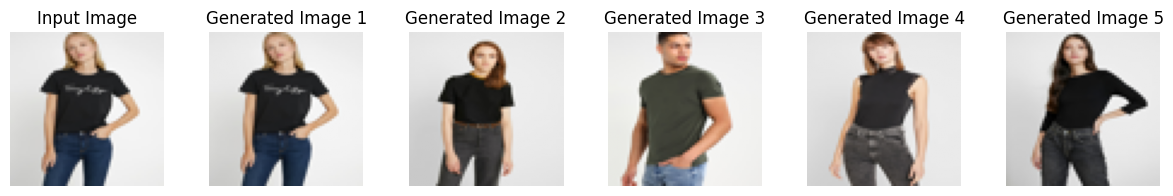

In [11]:
# Display generated images
fig, axs = plt.subplots(1, k + 1, figsize=(15, 2))
axs[0].imshow(input_image)
axs[0].set_title('Input Image')
axs[0].axis('off')
for i in range(k):
    axs[i + 1].imshow(generated_images[i])
    axs[i + 1].set_title(f'Generated Image {i+1}')
    axs[i + 1].axis('off')
plt.show()

Dataset link: https://drive.google.com/drive/folders/1gYgjOHPCDc5isccLbZt5Ojv48XqI2fVd?usp=sharing